<a href="https://colab.research.google.com/github/aleeraza-git/Portfolio/blob/main/Pneumonia_Detection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
print("Installing libraries...")
!pip install -q tensorflow keras matplotlib scikit-learn

# Import all required libraries
print("Importing libraries...")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import os

# Check TensorFlow version
print("✓ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

Installing libraries...
Importing libraries...
✓ All libraries imported successfully!
TensorFlow version: 2.19.0
Keras version: 3.10.0


In [2]:
# Create kaggle.json file with your credentials
import json
import os

kaggle_credentials = {
    "username": "aleerazaaa",
    "key": "KGAT_4e13457063f151d437ed52e8bce17582"
}

# Create .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Write credentials to kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

# Set proper permissions
os.chmod('/root/.kaggle/kaggle.json', 0o600)

print("✓ Kaggle API configured successfully!")
print(f"✓ Username: {kaggle_credentials['username']}")
print("✓ Ready to download datasets!")

✓ Kaggle API configured successfully!
✓ Username: aleerazaaa
✓ Ready to download datasets!


In [3]:
print("Downloading dataset from Kaggle...")
print("Dataset size: ~2GB")
print("This will take 5-10 minutes...")
print("=" * 60)

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

print("\n" + "=" * 60)
print("✓ Download complete!")
print("\nExtracting files...")
print("=" * 60)

!unzip -q chest-xray-pneumonia.zip

print("✓ Extraction complete!")
print("\nDataset structure:")

Dataset size: ~2GB
This will take 5-10 minutes...
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.28G/2.29G [00:26<00:00, 156MB/s]
100% 2.29G/2.29G [00:26<00:00, 94.4MB/s]

✓ Download complete!

Extracting files...
✓ Extraction complete!

Dataset structure:


In [4]:
# Verify dataset structure and count images
import os

train_dir = 'chest_xray/train'
test_dir = 'chest_xray/test'
val_dir = 'chest_xray/val'

print("=" * 70)
print("CHEST X-RAY PNEUMONIA DATASET - STATISTICS")
print("=" * 70)

print("\n📁 TRAINING DATA:")
train_normal = len(os.listdir(train_dir + '/NORMAL'))
train_pneumonia = len(os.listdir(train_dir + '/PNEUMONIA'))
print(f"   ✓ Normal X-rays: {train_normal:,} images")
print(f"   ✓ Pneumonia X-rays: {train_pneumonia:,} images")
print(f"   📊 Total Training: {train_normal + train_pneumonia:,} images")

print("\n📁 VALIDATION DATA:")
val_normal = len(os.listdir(val_dir + '/NORMAL'))
val_pneumonia = len(os.listdir(val_dir + '/PNEUMONIA'))
print(f"   ✓ Normal X-rays: {val_normal} images")
print(f"   ✓ Pneumonia X-rays: {val_pneumonia} images")
print(f"   📊 Total Validation: {val_normal + val_pneumonia} images")

print("\n📁 TEST DATA:")
test_normal = len(os.listdir(test_dir + '/NORMAL'))
test_pneumonia = len(os.listdir(test_dir + '/PNEUMONIA'))
print(f"   ✓ Normal X-rays: {test_normal} images")
print(f"   ✓ Pneumonia X-rays: {test_pneumonia} images")
print(f"   📊 Total Test: {test_normal + test_pneumonia} images")

total = train_normal + train_pneumonia + val_normal + val_pneumonia + test_normal + test_pneumonia
print("\n" + "=" * 70)
print(f"🎯 TOTAL DATASET SIZE: {total:,} images")
print("=" * 70)

# Show class distribution
print("\n📊 CLASS DISTRIBUTION:")
print(f"   Normal: {train_normal + val_normal + test_normal:,} images ({((train_normal + val_normal + test_normal)/total*100):.1f}%)")
print(f"   Pneumonia: {train_pneumonia + val_pneumonia + test_pneumonia:,} images ({((train_pneumonia + val_pneumonia + test_pneumonia)/total*100):.1f}%)")

print("\n✓ Dataset is ready for deep learning!")

CHEST X-RAY PNEUMONIA DATASET - STATISTICS

📁 TRAINING DATA:
   ✓ Normal X-rays: 1,341 images
   ✓ Pneumonia X-rays: 3,875 images
   📊 Total Training: 5,216 images

📁 VALIDATION DATA:
   ✓ Normal X-rays: 8 images
   ✓ Pneumonia X-rays: 8 images
   📊 Total Validation: 16 images

📁 TEST DATA:
   ✓ Normal X-rays: 234 images
   ✓ Pneumonia X-rays: 390 images
   📊 Total Test: 624 images

🎯 TOTAL DATASET SIZE: 5,856 images

📊 CLASS DISTRIBUTION:
   Normal: 1,583 images (27.0%)
   Pneumonia: 4,273 images (73.0%)

✓ Dataset is ready for deep learning!


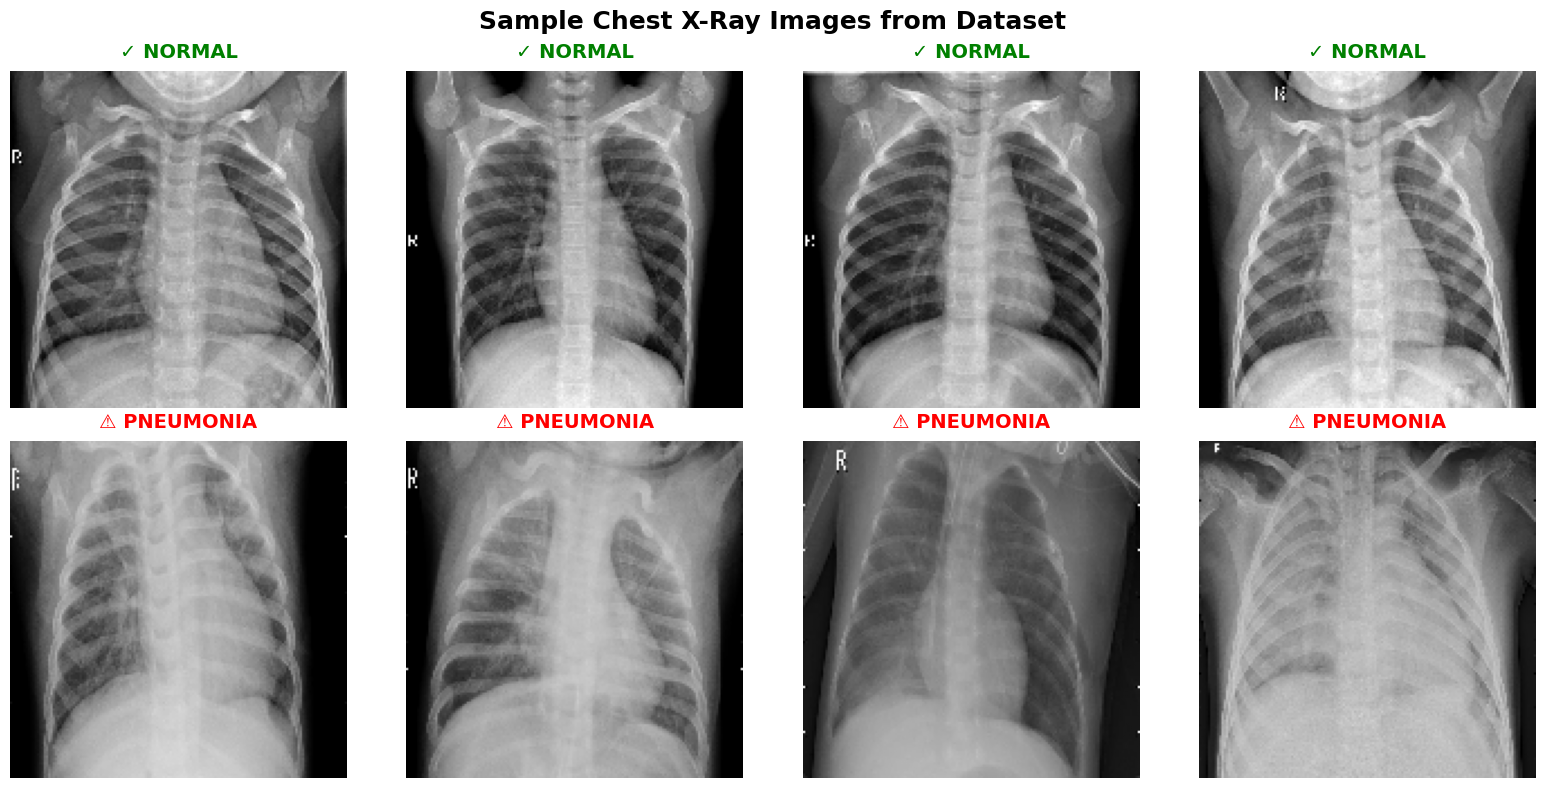

✓ Sample images displayed successfully!
Note: Top row shows healthy (normal) lungs
      Bottom row shows lungs with pneumonia


In [5]:
# Display sample chest X-ray images
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Set style
plt.style.use('default')

# Create figure
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Sample Chest X-Ray Images from Dataset', fontsize=18, fontweight='bold', y=0.98)

# Get random normal images
normal_images = os.listdir(train_dir + '/NORMAL')
random_normal = random.sample(normal_images, 4)

# Get random pneumonia images
pneumonia_images = os.listdir(train_dir + '/PNEUMONIA')
random_pneumonia = random.sample(pneumonia_images, 4)

# Display NORMAL images (top row)
for i, img_name in enumerate(random_normal):
    img_path = os.path.join(train_dir, 'NORMAL', img_name)
    img = image.load_img(img_path, target_size=(150, 150), color_mode='grayscale')
    img_array = image.img_to_array(img)

    axes[0, i].imshow(img_array.squeeze(), cmap='gray')
    axes[0, i].set_title('✓ NORMAL', fontsize=14, fontweight='bold', color='green', pad=10)
    axes[0, i].axis('off')
    axes[0, i].set_facecolor('#f0f0f0')

# Display PNEUMONIA images (bottom row)
for i, img_name in enumerate(random_pneumonia):
    img_path = os.path.join(train_dir, 'PNEUMONIA', img_name)
    img = image.load_img(img_path, target_size=(150, 150), color_mode='grayscale')
    img_array = image.img_to_array(img)

    axes[1, i].imshow(img_array.squeeze(), cmap='gray')
    axes[1, i].set_title('⚠ PNEUMONIA', fontsize=14, fontweight='bold', color='red', pad=10)
    axes[1, i].axis('off')
    axes[1, i].set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()

print("✓ Sample images displayed successfully!")
print("Note: Top row shows healthy (normal) lungs")
print("      Bottom row shows lungs with pneumonia")